# Interactive drawing example

A simple drawing app:

* Draw dots by clicking with LMB.
* Toggle color by clicking RMB.

In [1]:
import numpy as np
import jupyter_rfb

RFBOutputContext()

Drawingapp(css_height='400px', css_width='600px', resizable=False)
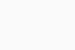

In [2]:
class Drawingapp(jupyter_rfb.RemoteFrameBuffer):
    def __init__(self):
        super().__init__()
        self.pixel_ratio = 1 / 8
        w, h = 600, 400
        self.css_width = f"{w}px"
        self.css_height = f"{h}px"
        self.resizable = False
        self.array = (
            np.ones((int(h * self.pixel_ratio), int(w * self.pixel_ratio), 4), np.uint8)
            * 5
        )
        self.pen_colors = [(1, 0.2, 0, 1), (0, 1, 0.2, 1), (0.2, 0, 1, 1)]
        self.pen_index = 0

    def handle_event(self, event):
        event_type = event.get("event_type", None)
        if event_type == "pointer_down":
            if event["button"] == 1:
                # Draw
                x = int(event["x"] * self.pixel_ratio)
                y = int(event["y"] * self.pixel_ratio)
                self.array[y, x] = 255 * np.array(self.pen_colors[self.pen_index])
                self.request_draw()
            elif event["button"] == 2:
                # Toggle color
                self.pen_index = (self.pen_index + 1) % len(self.pen_colors)

    def get_frame(self):
        return self.array


app = Drawingapp()
app

After some clicking ...

In [3]:
# We can also generate some clicks programatically :)
for x, y in [
    (503, 37),
    (27, 182),
    (182, 383),
    (396, 235),
    (477, 151),
    (328, 308),
    (281, 16),
]:
    app.handle_event({"event_type": "pointer_down", "button": 1, "x": x, "y": y})
app.handle_event({"event_type": "pointer_down", "button": 2, "x": 0, "y": 0})
for x, y in [
    (226, 115),
    (135, 253),
    (351, 220),
    (57, 11),
    (345, 87),
    (67, 175),
    (559, 227),
]:
    app.handle_event({"event_type": "pointer_down", "button": 1, "x": x, "y": y})


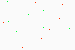

In [4]:
app.snapshot()

In [5]:
app.request_draw()